In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.getcwd())

/Users/sarojrai/Desktop/Udemy_MLOps/Finance/Credit card project/Experiment/Analysis


In [3]:
##loading data
credit = pd.read_excel(
    r"/Users/sarojrai/Desktop/Udemy_MLOps/Finance/Credit card project/Data/creditcard.xls",
    engine="xlrd",
    header=None
)

In [4]:
##head of data credit
pd.set_option("display.max_columns",None)
credit.columns = credit.iloc[1]
credit = credit[2:]
credit.reset_index(drop = True, inplace = True)

In [5]:
credit.head()

1,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
##drop column 1
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=1)

In [7]:
##credit records
credit.shape

(30000, 25)

In [8]:
##checking missing values
print(credit.isnull().sum())

1
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


No null values

In [9]:
##basic info
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [10]:
##rename the target column
credit.rename({"default payment next month":"default"}, axis=1, inplace=True)

In [11]:
##new column
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object', name=1)

In [12]:
## conversion of datatype
for i in credit.columns:
    credit[i]=credit[i].astype(int)

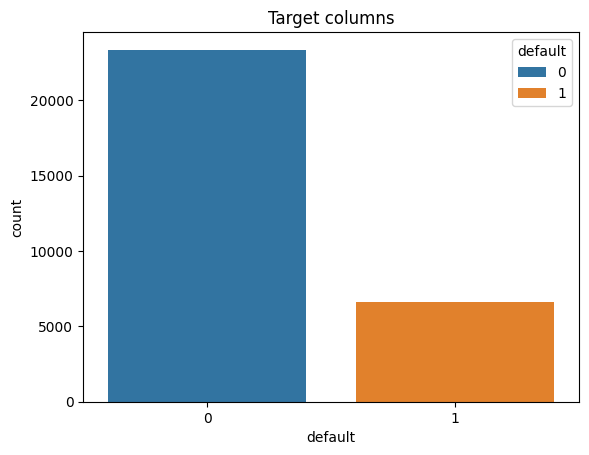

In [13]:
##target column
sns.countplot(x='default', data=credit, hue='default', legend=True)
plt.title("Target columns")
plt.show()

In [14]:
credit['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

## Data imbalance
Presence of data imbalance.

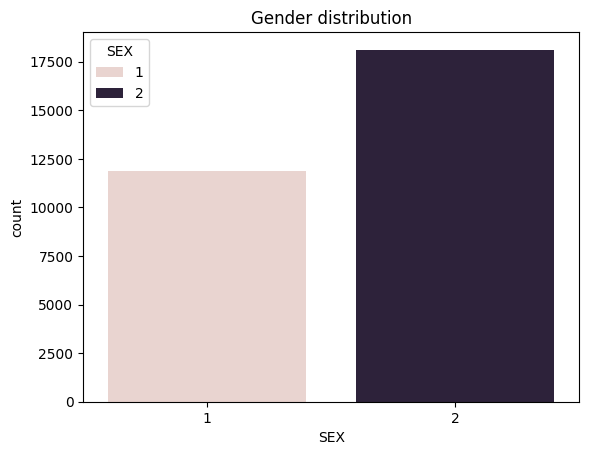

In [15]:
##sex distribution
sns.countplot(x=credit['SEX'], data=credit, hue='SEX')
plt.title("Gender distribution")
plt.show()

# Sex
- 1 is male
- 2 is Female

Overall, female counts is most in our dataset.

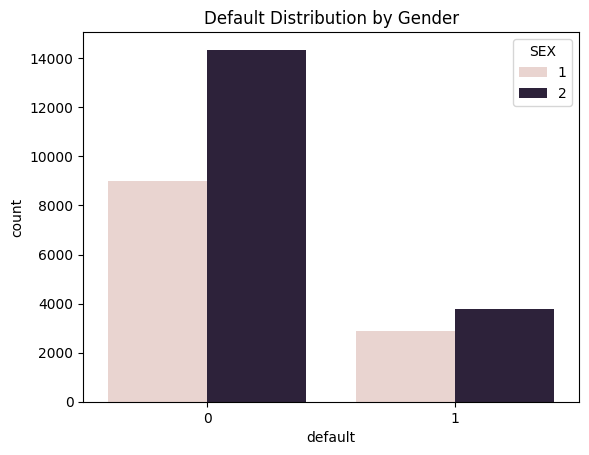

In [16]:
## default distribution by gender
sns.countplot(x='default', hue='SEX', data = credit, legend=True)
plt.title("Default Distribution by Gender")
plt.show()

## Observation
As default distribution plot, we can conclude that most of the payment default risk on female in the dataset. Data shows it is more risky to female customers.

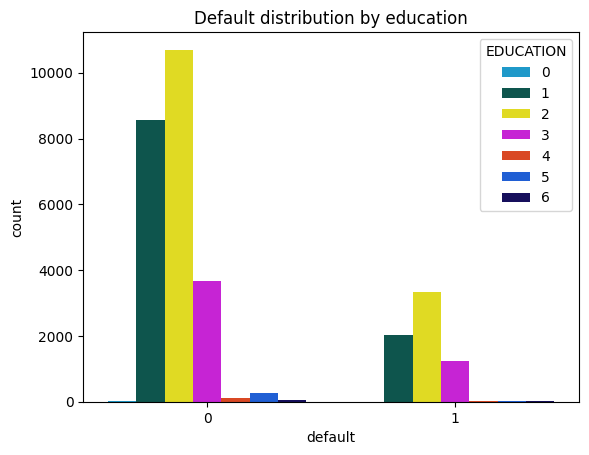

In [17]:
##Default distribution by education
darkc = [
    "#03A5E5",  # dark cyan
    "#026156",  # teal
    "#fff704",  # muted yellow
    "#de07f1",  # warm orange
    "#f73606",  # terracotta red
    "#0256f2",  # violet
    "#0B0269"   # dark navy
]
sns.countplot(x='default', hue='EDUCATION', data=credit, palette=darkc, legend=True)
plt.title("Default distribution by education")
plt.show()

## Observation
EDUCATION: 
- 1=graduate school, 
- 2=university, 
- 3=high school, 
- 4=others, 
- 5=unknown, 
- 6=unknown


In comparison with, although default distribution has less count than non-default distribution but the university going customer has high chances of default repayment followed by graduate school, and high school.

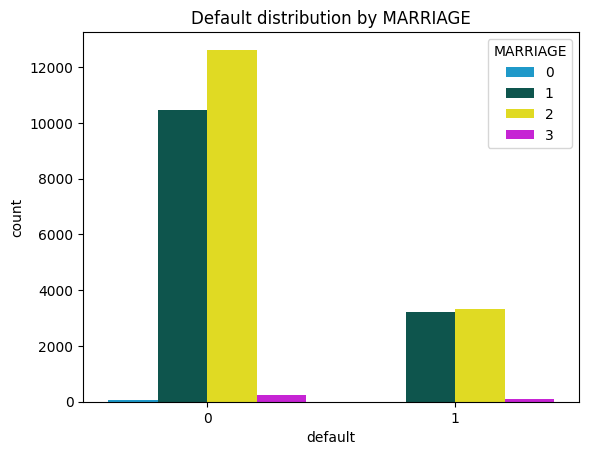

In [18]:
## Default distribution by marital status
sns.countplot(x='default', hue='MARRIAGE', palette=darkc, data=credit, legend=True)
plt.title("Default distribution by MARRIAGE")
plt.show()

## Observation
MARRIAGE: Marital status 
- 1=married, 
- 2=single, 
- 3=others

Marriage column has values like 0s. So, unmarried customer are highly risky followed by married

In [19]:
credit['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

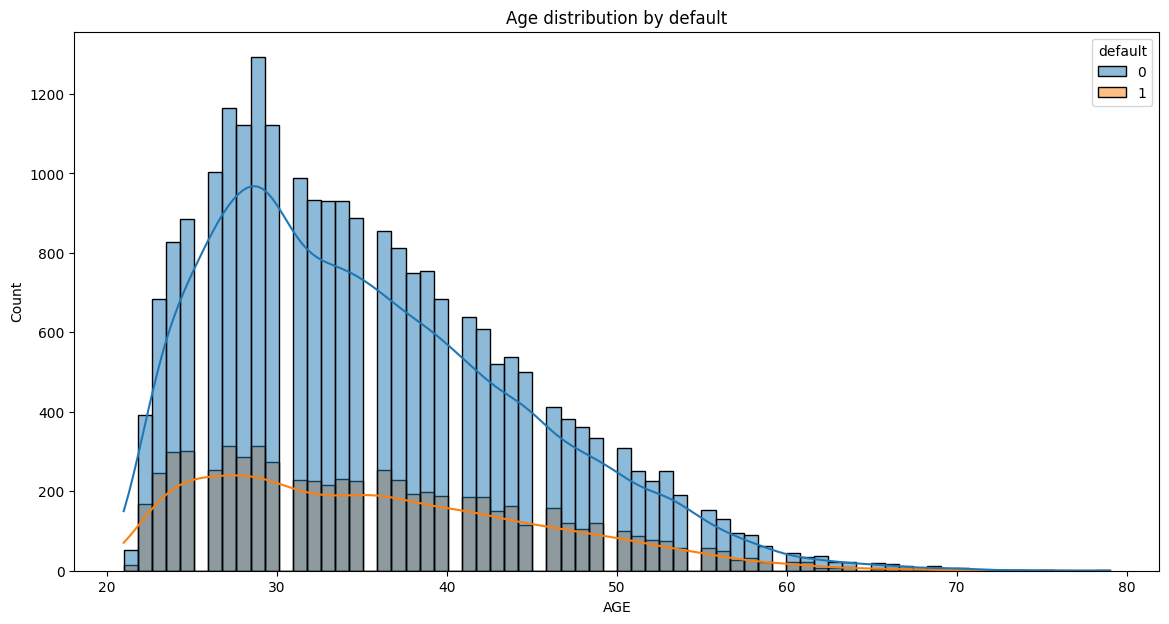

In [20]:
## Age distribution of default
plt.figure(figsize=(14,7))
sns.histplot(x='AGE', data=credit, kde=True, hue='default')
plt.title("Age distribution by default")
plt.show()

## Observation 
From the distribution plot, we can say that highly risky customer are age in between 20 - 30. So, as the age increases the default risk is decreasing. Also, most of the credit card user customer age falls between 20-40 years.

## Combine analysis
**Combine analysis of all default customer on three features together**

In [22]:
credit['AGE'].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

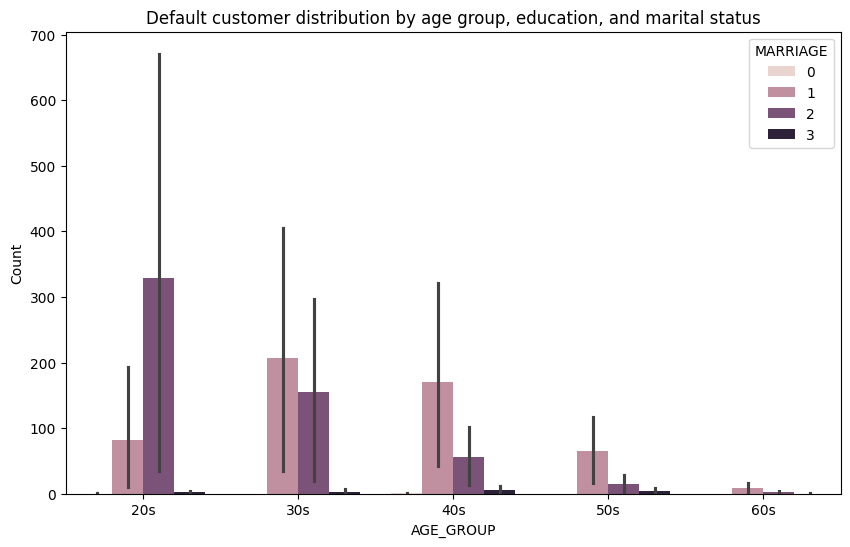

In [25]:
## Age bins
credit['AGE_GROUP']=pd.cut(credit['AGE'], bins=[20,30,40,50,60,70], labels=['20s','30s','40s','50s','60s'])

##only default customers
default_customer=credit[credit['default']==1]

##group default customer by age group, education, marital status.
default_group=default_customer.groupby(['EDUCATION','MARRIAGE','AGE_GROUP']).size().reset_index(name='Count')

##distribution plot
plt.figure(figsize=(10,6))
sns.barplot(data=default_group,x='AGE_GROUP', y='Count', hue='MARRIAGE')
plt.title("Default customer distribution by age group, education, and marital status")
plt.show()

# Other related plots

Text(0.5, 1.0, 'Count of Customers by Age Group and Marital Status')

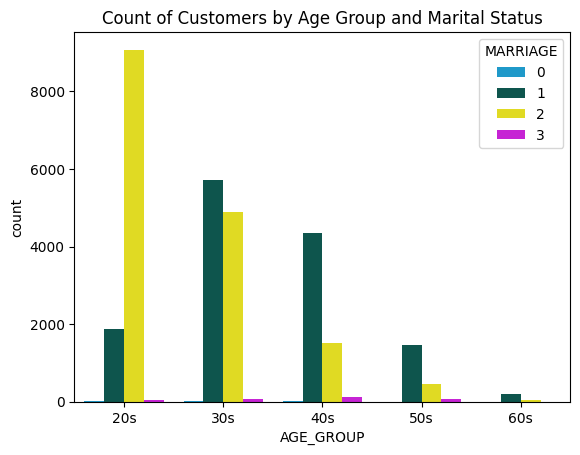

In [27]:
sns.countplot(data=credit, x='AGE_GROUP', hue='MARRIAGE', palette=darkc)
plt.title("Count of Customers by Age Group and Marital Status")

Text(0.5, 1.0, 'Age Distribution by Marital Status')

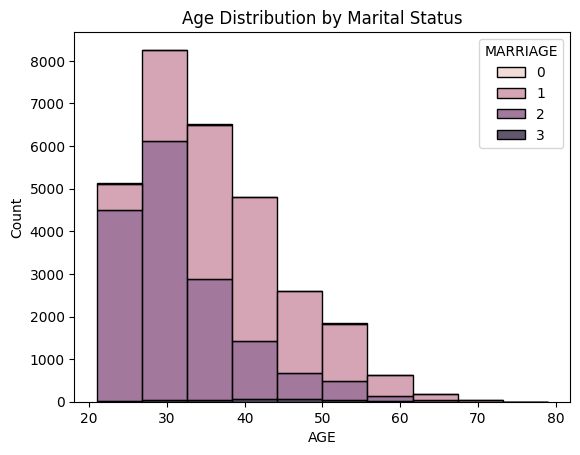

In [28]:
sns.histplot(data=credit, x='AGE', hue='MARRIAGE', multiple='stack', bins=10)
plt.title("Age Distribution by Marital Status")

Text(0.5, 1.0, 'Credit Limit Distribution by Age and Marital Status')

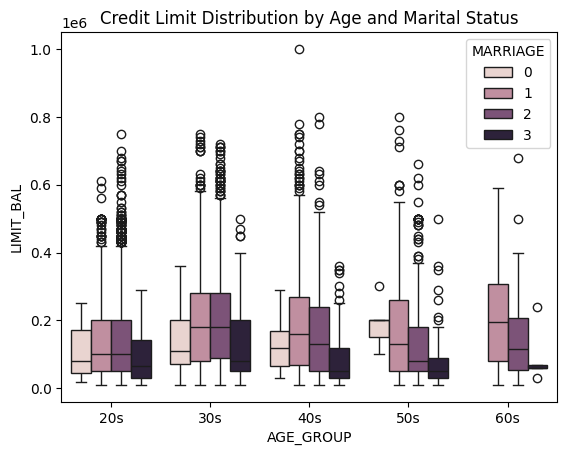

In [29]:
sns.boxplot(data=credit, x='AGE_GROUP', y='LIMIT_BAL', hue='MARRIAGE')
plt.title("Credit Limit Distribution by Age and Marital Status")

Text(0.5, 1.0, 'Distribution of Credit Limit by Age and Marital Status')

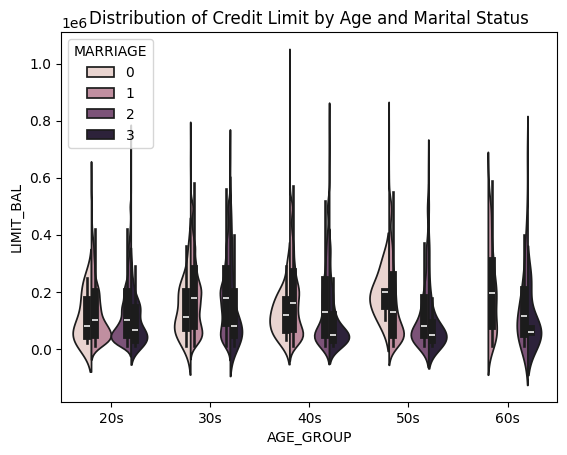

In [30]:
sns.violinplot(data=credit, x='AGE_GROUP', y='LIMIT_BAL', hue='MARRIAGE', split=True)
plt.title("Distribution of Credit Limit by Age and Marital Status")

# Financial Feature Analysis

- LIMIT_BAL: Credit limit — how much total credit the customer has been approved for.
- BILL_AMT1–6: Bill statement amounts from the last 6 months.
- PAY_AMT1–6: Actual payments made in the last 6 months.

## Check
- Financial behavior patterns of customers.
- Which factors influence default risk.

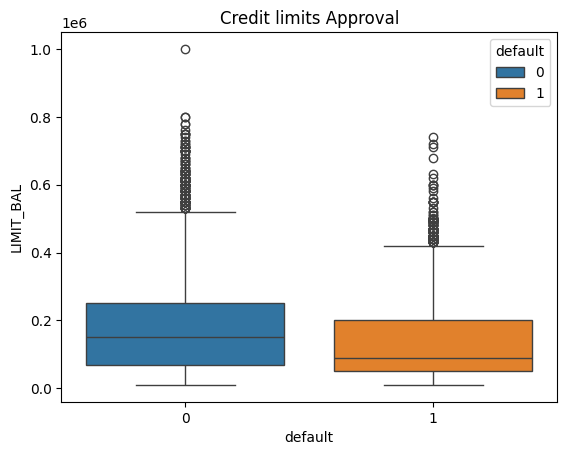

In [35]:
## limit balance
sns.boxplot(x='default', y='LIMIT_BAL', data=credit, hue='default')
plt.title("Credit limits Approval")
plt.show()

## Insights:
The median credit limit for defaulters is lower than non-defaulters.

## Inference:
The median credit limit of defaulting customers is significantly lower than that of non-defaulters. This suggests that customers with smaller credit limits are more financially constrained or have higher credit utilization, making them more likely to default. Financial institutions can use this insight to reassess credit scoring models and offer proactive interventions (e.g., reminders, limit adjustments) for low-limit customers.

So, lower median limit among defaulters means that customers with smaller credit capacity (perhaps lower income or weaker credit profile) are more prone to default.

## Assumption
1.	Creditworthiness: Lower credit limits often go to customers with limited income or short credit history — both increase default risk.
2.	Financial stress: People with low limits may utilize a larger portion of their credit (high utilization ratio), which makes repayment harder.
3.	Bank policy bias: Sometimes banks already assign lower limits to risky customers based on historical credit scoring models.


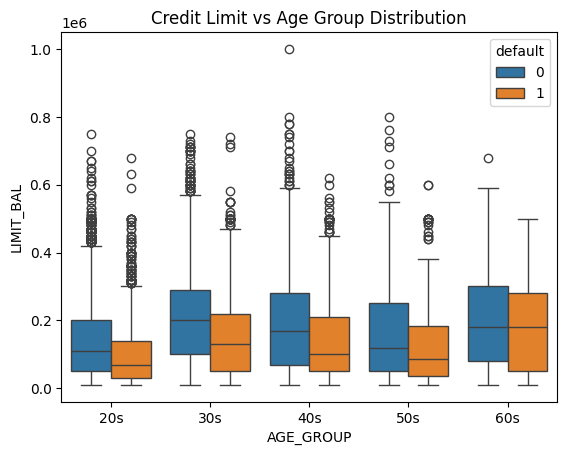

In [39]:
## More analysis
## Credit limit Vs Age Group
sns.boxplot(x='AGE_GROUP', y='LIMIT_BAL', hue='default', data=credit)
plt.title("Credit Limit vs Age Group Distribution")
plt.show()

## Insights
Younger customers tend to have lower median credit limit, which could indicate that financial institution are more cautious when offering high credit limits to this demographic. However, the presence of higher outliers among younger customers suggest that some individual still receives high credit limits perhaps due to better credit history or income level.

Indeed, Senior Cetizen customers have a more consistent median limit and fewer outliers, indicating stable and uniform credit policies for this age group.

## Inference
- Younger customers are seen as higher-risk, resulting in lower initial limits but with exceptions (outliers) for those with strong credit backgrounds.
- Senior customers have established credit histories, leading to more predictable and stable credit limits.